In [11]:
# A 'magic' command to display plots inline
%matplotlib inline

# Import all python modules. You need to run this cell for the other cells to work.
import requests 
import numpy as np
import pandas as pd
from datetime import datetime
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
models = ['HadGEM2-ES', 'MIROC5', 'CNRM-CM5', 'CanESM2']

In [27]:
df_list = []
for model in models:
    file = 'data/csv/pr_rcp85_{}.csv'.format(model)
    model_data = pd.read_csv(file)
    model_data['date'] = pd.to_datetime(model_data['date'])
    model_data = model_data.set_index('date')
    model_data['model'] = model
    annual_totals = []
    
    for year in np.arange(2006, 2100):
        df = pd.DataFrame(model_data[(model_data.index.year == year)])
        sum = np.sum(df['value'])
        df['annual_total'] = sum
        df['proportion'] = df['value'] / sum
        df.sort_values('proportion', inplace = True, ascending=False)
        df['cumsum'] = df.value.cumsum() 
        df_list.append(df)

In [28]:
modeled_data = pd.concat(df_list)
modeled_data

,value,model,annual_total,proportion,cumsum
date,,,,,
2006-01-16,63.087779,HadGEM2-ES,3296.723764,0.019137,63.087779
2006-04-10,61.365222,HadGEM2-ES,3296.723764,0.018614,124.453001
2006-12-29,60.013545,HadGEM2-ES,3296.723764,0.018204,184.466546
2006-03-12,58.513679,HadGEM2-ES,3296.723764,0.017749,242.980225
2006-12-27,57.126812,HadGEM2-ES,3296.723764,0.017328,300.107037
2006-12-28,51.097495,HadGEM2-ES,3296.723764,0.015499,351.204532
2006-11-21,45.117996,HadGEM2-ES,3296.723764,0.013686,396.322528
2006-01-03,39.917197,HadGEM2-ES,3296.723764,0.012108,436.239725
2006-12-26,39.599619,HadGEM2-ES,3296.723764,0.012012,475.839345


In [23]:
df_list = []
file = 'data/csv/livneh_pr.csv'
livneh_data = pd.read_csv(file)
livneh_data['date'] = pd.to_datetime(livneh_data['date'])
livneh_data = livneh_data.set_index('date')
livneh_data['model'] = 'livneh'

for year in np.arange(1950, 2007):
    df = pd.DataFrame(livneh_data[(livneh_data.index.year == year)])
    sum = np.sum(df['value'])
    df['annual_total'] = sum
    df['proportion'] = df['value'] / sum
    df.sort_values('proportion', inplace = True, ascending=False)
    df['cumsum'] = df.value.cumsum() 
    df_list.append(df)

In [24]:
observed_data = pd.concat(df_list)
observed_data

,value,model,annual_total,proportion,cumsum
date,,,,,
1950-10-28,91.251968,livneh,1841.801839,0.049545,91.251968
1950-10-27,80.822189,livneh,1841.801839,0.043882,172.074158
1950-10-29,63.859795,livneh,1841.801839,0.034672,235.933952
1950-11-16,52.931831,livneh,1841.801839,0.028739,288.865784
1950-12-03,51.710804,livneh,1841.801839,0.028076,340.576588
1950-12-02,47.310966,livneh,1841.801839,0.025687,387.887554
1950-01-17,46.609375,livneh,1841.801839,0.025306,434.496929
1950-10-26,43.130836,livneh,1841.801839,0.023418,477.627766
1950-01-10,32.727409,livneh,1841.801839,0.017769,510.355175


In [38]:
data = pd.concat([observed_data, modeled_data])

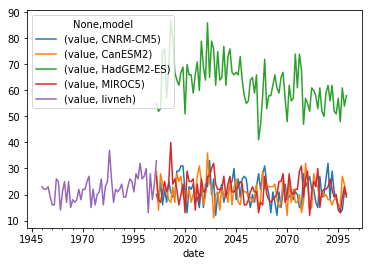

In [39]:
wettest = data.loc[data['cumsum'] < data['annual_total'] / 2]
wettest = wettest.groupby('model').resample('1AS').count()
wettest = wettest.drop(['model', 'annual_total', 'proportion', 'cumsum'], axis=1)
wettest.unstack('model').plot()

In [40]:
# Filter data by baseline time period
baseline = data.loc['1961-01-01':'1990-12-31']
threshold = baseline['value'].quantile(0.98, interpolation='linear')
print('Extreme Precipitation Threshold value for North Coast is', round(threshold, 1), 'mm')

Extreme Precipitation Threshold value for North Coast is 33.3 mm


In [42]:
# Filter days > threshold
extreme_days = pd.DataFrame(data[data.value > threshold])
extreme_days = extreme_days.drop(['annual_total', 'proportion', 'cumsum'], axis=1)
extreme_days

,value,model
date,,
1950-10-28,91.251968,livneh
1950-10-27,80.822189,livneh
1950-10-29,63.859795,livneh
1950-11-16,52.931831,livneh
1950-12-03,51.710804,livneh
1950-12-02,47.310966,livneh
1950-01-17,46.609375,livneh
1950-10-26,43.130836,livneh
1951-02-04,61.059948,livneh


In [44]:
count_by_year = extreme_days.groupby(['model']).value.resample('1AS').count().unstack('model')
count_by_year

model,CNRM-CM5,CanESM2,HadGEM2-ES,MIROC5,livneh
date,,,,,
1950-01-01,NaN,NaN,NaN,NaN,8.0
1951-01-01,NaN,NaN,NaN,NaN,8.0
1952-01-01,NaN,NaN,NaN,NaN,6.0
1953-01-01,NaN,NaN,NaN,NaN,8.0
1954-01-01,NaN,NaN,NaN,NaN,12.0
1955-01-01,NaN,NaN,NaN,NaN,7.0
1956-01-01,NaN,NaN,NaN,NaN,8.0
1957-01-01,NaN,NaN,NaN,NaN,10.0
1958-01-01,NaN,NaN,NaN,NaN,10.0


Text(0,0.5,'Number of Extreme Precip Days by Year')

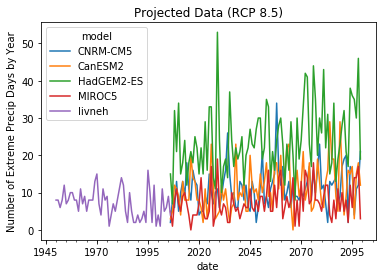

In [46]:
# Plot
count_by_year.plot()
plt.title("Projected Data (RCP 8.5)")
plt.ylabel("Number of Extreme Precip Days by Year")

In [47]:
count_by_month = extreme_days.groupby(['model']).value.resample('M').count().unstack('model')
count_by_month['month'] = count_by_month.index.month
count_by_month['year'] = count_by_month.index.year
count_by_month.fillna(0, inplace=True)
count_by_month

model,CNRM-CM5,CanESM2,HadGEM2-ES,MIROC5,livneh,month,year
date,,,,,,,
1950-01-31,0.0,0.0,0.0,0.0,1.0,1,1950
1950-02-28,0.0,0.0,0.0,0.0,0.0,2,1950
1950-03-31,0.0,0.0,0.0,0.0,0.0,3,1950
1950-04-30,0.0,0.0,0.0,0.0,0.0,4,1950
1950-05-31,0.0,0.0,0.0,0.0,0.0,5,1950
1950-06-30,0.0,0.0,0.0,0.0,0.0,6,1950
1950-07-31,0.0,0.0,0.0,0.0,0.0,7,1950
1950-08-31,0.0,0.0,0.0,0.0,0.0,8,1950
1950-09-30,0.0,0.0,0.0,0.0,0.0,9,1950


In [48]:
cool_wet = count_by_month.pivot(index='month', columns='year', values='CNRM-CM5').sort_index(ascending=False)
hot_dry = count_by_month.pivot(index='month', columns='year', values='HadGEM2-ES').sort_index(ascending=False)
average = count_by_month.pivot(index='month', columns='year', values='CanESM2').sort_index(ascending=False)
complement = count_by_month.pivot(index='month', columns='year', values='MIROC5').sort_index(ascending=False)

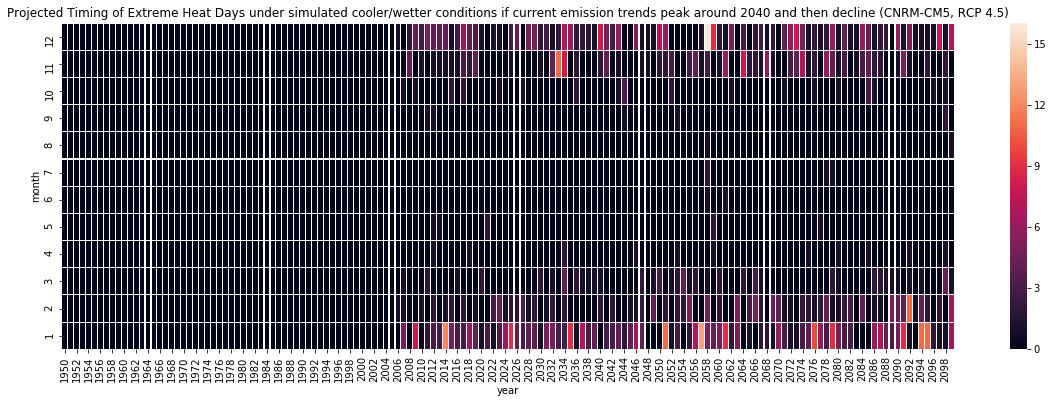

In [49]:
plt.figure(figsize=(20,6))
ax = sns.heatmap(cool_wet, linewidth=0.1)
plt.title("Projected Timing of Extreme Heat Days under simulated cooler/wetter conditions if current emission trends peak around 2040 and then decline (CNRM-CM5, RCP 4.5)")
plt.show()